In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
# import data
url = 'https://github.com/mattharrison/datasets/raw/master/data/Presidents.xls'
pres = pd.read_excel(url)

In [3]:
# inspect columns
pres.columns

Index(['President', 'Years in office', 'Year first inaugurated',
       'Age at inauguration', 'State elected from', '# of electoral votes',
       '# of popular votes', 'National total votes', 'Total electoral votes',
       'Rating points', 'Political Party', 'Occupation', 'College',
       '% electoral', '% popular'],
      dtype='object')

In [4]:
# inspect data types
pres.dtypes

President                  object
Years in office           float64
Year first inaugurated      int64
Age at inauguration         int64
State elected from         object
# of electoral votes        int64
# of popular votes         object
National total votes       object
Total electoral votes       int64
Rating points             float64
Political Party            object
Occupation                 object
College                    object
% electoral               float64
% popular                  object
dtype: object

In [5]:
# sample data
pres.head(n = 10)

,President,Years in office,Year first inaugurated,Age at inauguration,State elected from,# of electoral votes,# of popular votes,National total votes,Total electoral votes,Rating points,Political Party,Occupation,College,% electoral,% popular
0,George Washington,8.0,1789,57,Virginia,69,NA(),NA(),69,842.0,None,Planter,None,100.000000,NA()
1,John Adams,4.0,1797,61,Massachusetts,132,NA(),NA(),139,598.0,Federalist,Lawyer,Harvard,94.964029,NA()
2,Thomas Jefferson,8.0,1801,57,Virginia,73,NA(),NA(),137,711.0,Democratic-Republican,"Planter, Lawyer",William and Mary,53.284672,NA()
3,James Madison,8.0,1809,57,Virginia,122,NA(),NA(),176,567.0,Democratic-Republican,Lawyer,Princeton,69.318182,NA()
4,James Monroe,8.0,1817,58,Virginia,183,NA(),NA(),221,602.0,Democratic-Republican,Lawyer,William and Mary,82.805430,NA()
5,John Quincy Adams,4.0,1825,57,Massachusetts,84,NA(),NA(),261,564.0,Democratic-Republican,Lawyer,Harvard,32.183908,NA()
6,Andrew Jackson,8.0,1829,61,Tennessee,178,642553,1148018,261,632.0,Democrat,Lawyer,None,68.199234,55.970638
7,Martin Van Buren,4.0,1837,54,New York,170,764176,1503534,294,429.0,Democrat,Lawyer,None,57.823129,50.825322
8,William Henry Harrison,0.8,1841,68,Ohio,234,1275390,2411808,294,329.0,Whig,Soldier,Hampden-Sydney,79.591837,52.881075
9,James K. Polk,4.0,1845,49,Tennessee,170,1339494,2703659,275,632.0,Democrat,Lawyer,U. of North Carolina,61.818182,49.543748


In [6]:
# inspect value count for % popular column
pres['% popular'].value_counts(dropna = False)

NA()                  6
55.97063809104038     1
47.86702951427554     1
43.00629157684384     1
53.37794734979007     1
50.747316475097485    1
50.06476356354843     1
43.42033433706673     1
49.71939718397605     1
55.13488317141534     1
57.422316653879044    1
58.19999769504862     1
60.30291936999122     1
41.840086967835774    1
51.578278560914946    1
51.008995720212305    1
46.05041747756343     1
47.82341179901821     1
48.50487882588967     1
48.273129781269475    1
47.95272278319255     1
52.663723866043156    1
39.822510047356126    1
45.283152886058886    1
50.84112681579971     1
47.28398740754325     1
49.54374793566792     1
52.88107511045656     1
50.82532220754569     1
53.68745746733625     1
Name: % popular, dtype: int64

In [7]:
# replace na values in % popular column
pres['% popular'].replace('NA()', '', regex = False).unique()

array(['', 55.97063809104038, 50.82532220754569, 52.88107511045656,
       49.54374793566792, 47.28398740754325, 50.84112681579971,
       45.283152886058886, 39.822510047356126, 52.663723866043156,
       47.95272278319255, 48.273129781269475, 48.50487882588967,
       47.82341179901821, 46.05041747756343, 51.008995720212305,
       51.578278560914946, 41.840086967835774, 60.30291936999122,
       58.19999769504862, 57.422316653879044, 55.13488317141534,
       49.71939718397605, 43.42033433706673, 50.06476356354843,
       50.747316475097485, 53.37794734979007, 43.00629157684384,
       47.86702951427554, 53.68745746733625], dtype=object)

In [8]:
# apply transformations to clean data
def clean_cols(val):
    return val.replace(' ', '_').replace('#', 'Num').replace('%', 'Per')

def clean_pop(df):
    col = (df
            ['Per_popular']
            .replace('NA()', np.nan)
            .astype(float)
        )
    
    return col.fillna(col.mean())

pres2 = (pres
    .rename(columns = clean_cols)
    .assign(date = lambda df_:pd.to_datetime(df_.Year_first_inaugurated, format = '%Y'),
        Per_popular = clean_pop)
)

pres2.head(n = 10)

,President,Years_in_office,Year_first_inaugurated,Age_at_inauguration,State_elected_from,Num_of_electoral_votes,Num_of_popular_votes,National_total_votes,Total_electoral_votes,Rating_points,Political_Party,Occupation,College,Per_electoral,Per_popular,date
0,George Washington,8.0,1789,57,Virginia,69,NA(),NA(),69,842.0,None,Planter,None,100.000000,50.037857,1789-01-01
1,John Adams,4.0,1797,61,Massachusetts,132,NA(),NA(),139,598.0,Federalist,Lawyer,Harvard,94.964029,50.037857,1797-01-01
2,Thomas Jefferson,8.0,1801,57,Virginia,73,NA(),NA(),137,711.0,Democratic-Republican,"Planter, Lawyer",William and Mary,53.284672,50.037857,1801-01-01
3,James Madison,8.0,1809,57,Virginia,122,NA(),NA(),176,567.0,Democratic-Republican,Lawyer,Princeton,69.318182,50.037857,1809-01-01
4,James Monroe,8.0,1817,58,Virginia,183,NA(),NA(),221,602.0,Democratic-Republican,Lawyer,William and Mary,82.805430,50.037857,1817-01-01
5,John Quincy Adams,4.0,1825,57,Massachusetts,84,NA(),NA(),261,564.0,Democratic-Republican,Lawyer,Harvard,32.183908,50.037857,1825-01-01
6,Andrew Jackson,8.0,1829,61,Tennessee,178,642553,1148018,261,632.0,Democrat,Lawyer,None,68.199234,55.970638,1829-01-01
7,Martin Van Buren,4.0,1837,54,New York,170,764176,1503534,294,429.0,Democrat,Lawyer,None,57.823129,50.825322,1837-01-01
8,William Henry Harrison,0.8,1841,68,Ohio,234,1275390,2411808,294,329.0,Whig,Soldier,Hampden-Sydney,79.591837,52.881075,1841-01-01
9,James K. Polk,4.0,1845,49,Tennessee,170,1339494,2703659,275,632.0,Democrat,Lawyer,U. of North Carolina,61.818182,49.543748,1845-01-01


In [9]:
# display summary statistics
pres2.describe()

,Years_in_office,Year_first_inaugurated,Age_at_inauguration,Num_of_electoral_votes,Total_electoral_votes,Rating_points,Per_electoral,Per_popular
count,34.000000,35.000000,35.000000,35.000000,35.000000,33.000000,35.000000,35.000000
mean,5.185294,1892.542857,55.085714,261.114286,385.085714,552.606061,68.048420,50.037857
std,2.638426,64.758530,6.381828,118.620198,143.817567,159.117280,15.092928,4.415534
min,0.500000,1789.000000,43.000000,69.000000,69.000000,259.000000,32.183908,39.822510
25%,4.000000,1843.000000,51.000000,176.000000,292.000000,444.000000,57.123855,47.909876
50%,4.000000,1885.000000,55.000000,234.000000,401.000000,564.000000,66.459627,50.037857
75%,8.000000,1943.000000,57.500000,343.000000,531.000000,632.000000,80.756370,52.121001
max,12.000000,2009.000000,69.000000,489.000000,538.000000,900.000000,100.000000,60.302919


In [10]:
# display correlation matrix
pres2.corr()

,Years_in_office,Year_first_inaugurated,Age_at_inauguration,Num_of_electoral_votes,Total_electoral_votes,Rating_points,Per_electoral,Per_popular
Years_in_office,1.000000,0.091405,-0.013884,0.189504,0.006644,0.561997,0.356822,0.077094
Year_first_inaugurated,0.091405,1.000000,-0.205148,0.813173,0.941152,-0.014443,-0.031064,0.045808
Age_at_inauguration,-0.013884,-0.205148,1.000000,-0.019789,-0.204842,-0.089048,0.259161,0.088462
Num_of_electoral_votes,0.189504,0.813173,-0.019789,1.000000,0.884852,0.022893,0.380289,0.293977
Total_electoral_votes,0.006644,0.941152,-0.204842,0.884852,1.000000,-0.058848,-0.044127,0.102212
Rating_points,0.561997,-0.014443,-0.089048,0.022893,-0.058848,1.000000,0.176893,-0.155874
Per_electoral,0.356822,-0.031064,0.259161,0.380289,-0.044127,0.176893,1.000000,0.365212
Per_popular,0.077094,0.045808,0.088462,0.293977,0.102212,-0.155874,0.365212,1.000000


In [11]:
# display correlation matrix with color map
pres2.corr().style.background_gradient(cmap = 'RdBu', vmin = -1, vmax = 1)

,Years_in_office,Year_first_inaugurated,Age_at_inauguration,Num_of_electoral_votes,Total_electoral_votes,Rating_points,Per_electoral,Per_popular
Years_in_office,1.000000,0.091405,-0.013884,0.189504,0.006644,0.561997,0.356822,0.077094
Year_first_inaugurated,0.091405,1.000000,-0.205148,0.813173,0.941152,-0.014443,-0.031064,0.045808
Age_at_inauguration,-0.013884,-0.205148,1.000000,-0.019789,-0.204842,-0.089048,0.259161,0.088462
Num_of_electoral_votes,0.189504,0.813173,-0.019789,1.000000,0.884852,0.022893,0.380289,0.293977
Total_electoral_votes,0.006644,0.941152,-0.204842,0.884852,1.000000,-0.058848,-0.044127,0.102212
Rating_points,0.561997,-0.014443,-0.089048,0.022893,-0.058848,1.000000,0.176893,-0.155874
Per_electoral,0.356822,-0.031064,0.259161,0.380289,-0.044127,0.176893,1.000000,0.365212
Per_popular,0.077094,0.045808,0.088462,0.293977,0.102212,-0.155874,0.365212,1.000000


<AxesSubplot:>

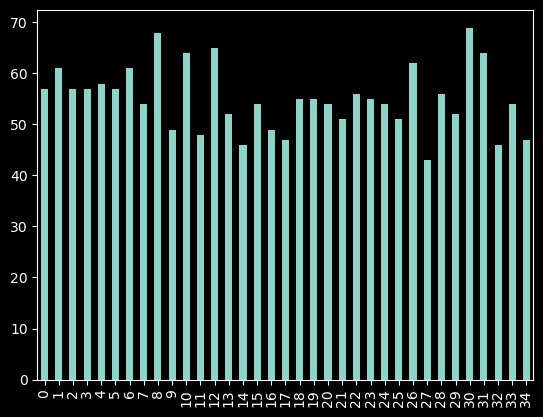

In [12]:
# display basic bar plot
(pres2
    .Age_at_inauguration
    .plot.bar()
)

<AxesSubplot:ylabel='President'>

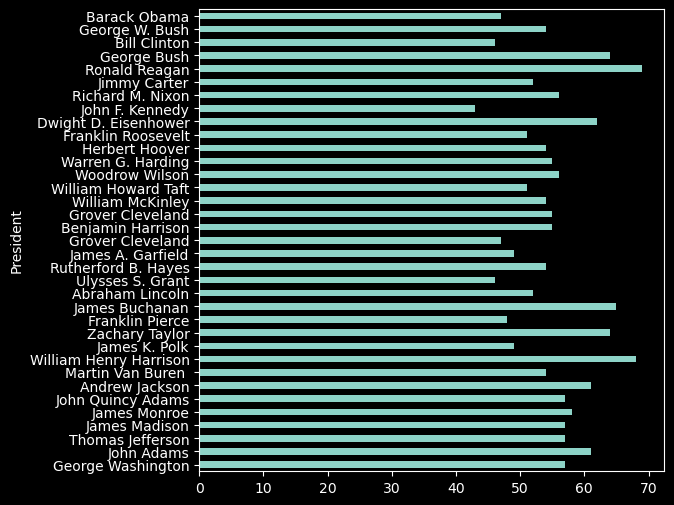

In [13]:
# replace index with president name for basic bar plot
(pres2
    .set_index('President')
    .Age_at_inauguration
    .plot.barh(figsize = (6, 6))    
)

<AxesSubplot:ylabel='Political_Party'>

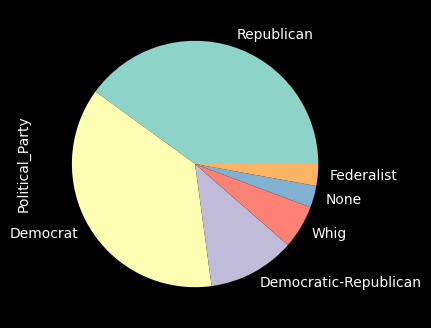

In [14]:
# display pie chart
(pres2
    .Political_Party
    .value_counts()
    .plot.pie(figsize = (6, 4))
)

<AxesSubplot:>

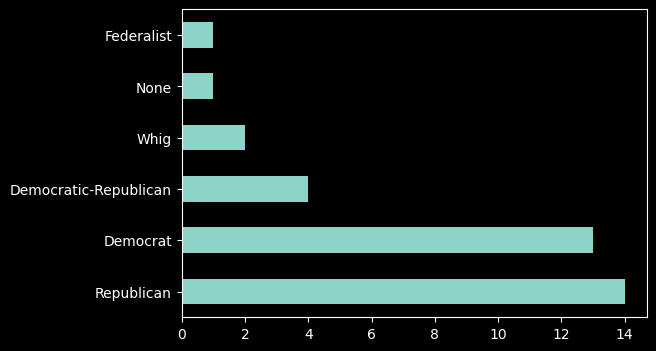

In [15]:
# display political parties with a bar plot
(pres2
    .Political_Party
    .value_counts()
    .plot.barh(figsize = (6, 4))
)

<AxesSubplot:>

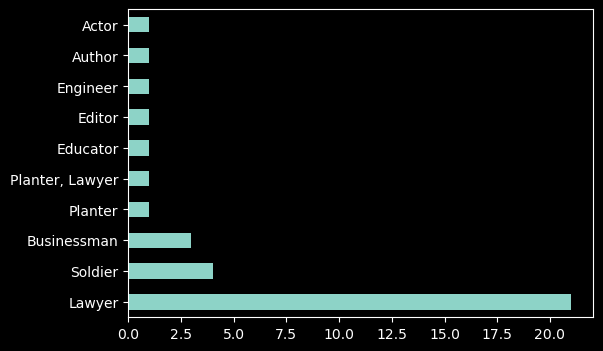

In [16]:
# display occupations with a bar plot
(pres2
    .Occupation
    .value_counts()
    .plot.barh(figsize = (6, 4))
)

<AxesSubplot:>

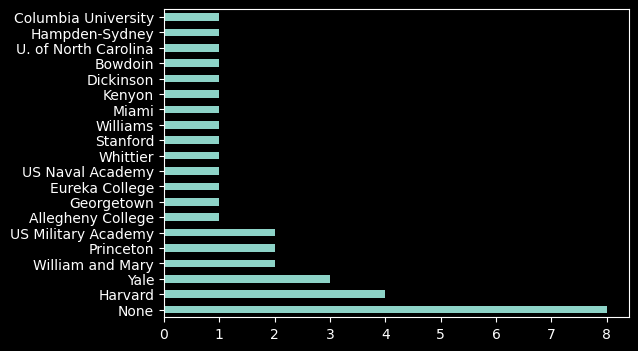

In [17]:
# display colleges with a bar plot
(pres2
    .College
    .value_counts()
    .plot.barh(figsize = (6, 4))
)

In [18]:
# filter years in office
pres2[pres2.Years_in_office < 4]

,President,Years_in_office,Year_first_inaugurated,Age_at_inauguration,State_elected_from,Num_of_electoral_votes,Num_of_popular_votes,National_total_votes,Total_electoral_votes,Rating_points,Political_Party,Occupation,College,Per_electoral,Per_popular,date
8,William Henry Harrison,0.8,1841,68,Ohio,234,1275390,2411808,294,329.0,Whig,Soldier,Hampden-Sydney,79.591837,52.881075,1841-01-01
10,Zachary Taylor,1.0,1849,64,Louisiana,163,1361393,2879184,290,447.0,Whig,Soldier,None,56.206897,47.283987,1849-01-01
16,James A. Garfield,0.5,1881,49,Ohio,214,4446158,9210420,369,444.0,Republican,Lawyer,Williams,57.994580,48.273130,1881-01-01
23,Warren G. Harding,2.0,1921,55,Ohio,404,16133314,26753786,531,326.0,Republican,Editor,None,76.082863,60.302919,1921-01-01
27,John F. Kennedy,3.0,1961,43,Massachusetts,303,34221344,68828960,537,704.0,Democrat,Author,Harvard,56.424581,49.719397,1961-01-01


In [19]:
# group by plotical party
(pres2
    .groupby('Political_Party')
    .mean()
)

,Years_in_office,Year_first_inaugurated,Age_at_inauguration,Num_of_electoral_votes,Total_electoral_votes,Rating_points,Per_electoral,Per_popular
Political_Party,,,,,,,,
Democrat,5.583333,1906.538462,51.846154,283.384615,421.538462,562.500000,66.807071,49.443046
Democratic-Republican,7.000000,1813.000000,57.250000,115.500000,198.750000,611.000000,59.398048,50.037857
Federalist,4.000000,1797.000000,61.000000,132.000000,139.000000,598.000000,94.964029,50.037857
None,8.000000,1789.000000,57.000000,69.000000,69.000000,842.000000,100.000000,50.037857
Republican,4.821429,1923.285714,55.357143,313.928571,457.928571,525.076923,67.489129,50.583800
Whig,0.900000,1845.000000,66.000000,198.500000,292.000000,388.000000,67.899367,50.082531
